Website that I got this idea from: 

http://learnandshare645.blogspot.com/2016/06/feeding-your-own-data-set-into-cnn.html - reading in a directory of files to do the keras on.
 
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html - creating a new sample of pictures from the old ones.

https://www.youtube.com/watch?v=LhEMXbjGV_4 - Preprocess images using keras.preprocessing.image

https://www.youtube.com/watch?v=daovGOlMbT4&index=12&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL - Training the Keras model with fit_generator and batches

Imports

In [24]:
from keras.applications import *
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import *
from keras.layers import BatchNormalization
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow import keras

import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import os
#import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split


In [25]:
img_rows, img_cols = 224, 224
img_channels = 3

Figure out how to read in my own images
1. get the current path to the images
2. for each directory, read in the files
3. Convert the files to read into the keras

In [26]:
trng_path = os.getcwd()+'/myimages/catsndogs/train'
test_path = os.getcwd()+'/myimages/catsndogs/test'

train_batch = idg().flow_from_directory(trng_path, target_size=(img_rows, img_cols), color_mode='rgb', classes=['dogs','cats'], class_mode='categorical', batch_size=100)
test_batch = idg().flow_from_directory(test_path, target_size=(img_rows, img_cols), color_mode='rgb', classes=['dogs','cats'], class_mode='categorical', batch_size=50)

Found 459 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [27]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if(type(ims[0])) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        if(titles is not None):
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

# Images and labels
Get the images from the training batch and the labels

In [28]:
# Set up the images for test and train. 
x_imgs,y_labels = next(train_batch)
x_timgs, y_tlabs = next(test_batch)

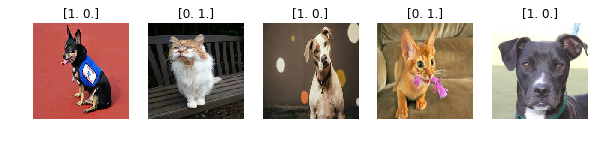

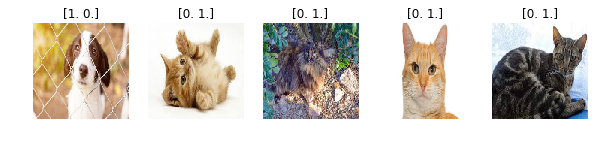

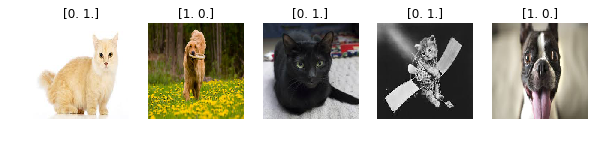

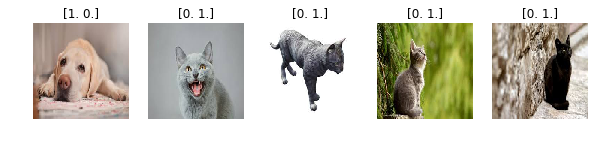

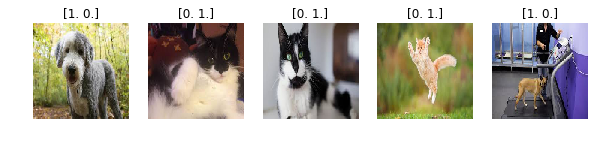

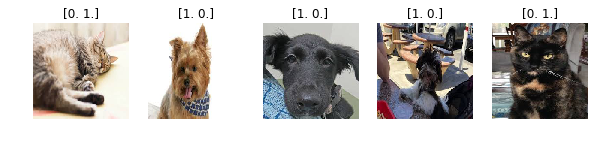

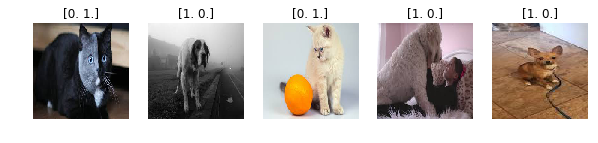

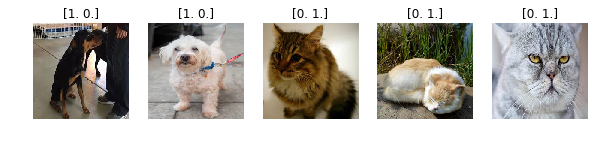

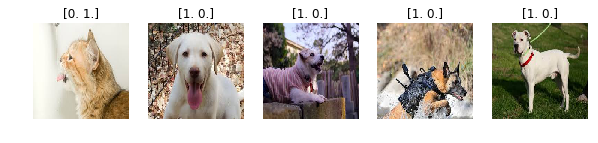

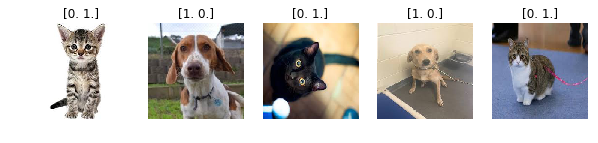

In [29]:
#plots(x_imgs,titles = y_labels)
plots(x_timgs[0:5],titles = y_tlabs[0:5])
plots(x_timgs[5:10],titles = y_tlabs[5:10])
plots(x_timgs[10:15],titles = y_tlabs[10:15])
plots(x_timgs[15:20],titles = y_tlabs[15:20])
plots(x_timgs[20:25],titles = y_tlabs[20:25])
plots(x_timgs[25:30],titles = y_tlabs[25:30])
plots(x_timgs[30:35],titles = y_tlabs[30:35])
plots(x_timgs[35:40],titles = y_tlabs[35:40])
plots(x_timgs[40:45],titles = y_tlabs[40:45])
plots(x_timgs[45:50],titles = y_tlabs[45:50])


# Batch Model
Create a model with the batch test data instead of x,y

# VGG-16 Model

We will now use the VGG-16 Model and fine tune it to work with our data to train with and predict. After that, we will use the VGG to predict to see if it preforms better. 

In [7]:
# Create a vgg model that is trained
model2 = VGG16(include_top=True)
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
# create a new model but remove the last layer
new_model = Model(model2.inputs, model2.layers[-2].output)

#make all layers untrainable (which means that they will not be retrained.  Use the weights in the original model.)
for layer in new_model.layers[:25]:
    layer.trainable = False

# Running the new Model
We could not get this model to run on the Virtual machine, but instead had to run it on the Lab machine.  The accuracy of the model was best at 7 Epochs with 91% accuracy.


In [9]:
#Add the new layer to the model - this will be trained
l1 = Dense(128)(new_model.layers[-1].output)
l2 = Dense(2, activation='sigmoid')(l1)
final_model = Model(new_model.inputs, [l2])
final_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [10]:
type(final_model)

tensorflow.python.keras.engine.training.Model

In [11]:
final_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
batch_size_value = 128
learning_rate = 0.01
epochs_value = 5
training_model = final_model.fit(x_imgs,y_labels, 
                           batch_size=batch_size_value, 
                           epochs=epochs_value,
                           validation_data=(x_timgs, y_tlabs))

Train on 100 samples, validate on 50 samples
Epoch 1/5


# Predicting with the model
Below is the prediction for the final model.
1. Load the model 
1. Evaluate the model
1. Find the incorrect ones
1. Check them to see if there is something about them that causes issues

In [31]:
os.getcwd() + '/heather_cat_dog_model_epoch_29.keras'

'/home/student/project/gitcode/heather_cat_dog_model_epoch_29.keras'

In [32]:
final_model.load_weights(os.getcwd() + '/heather_cat_dog_model_epoch_29.keras')

In [36]:
from tensorflow.python.keras.models import load_model
os.getcwd()
model = load_model(os.getcwd() + '/heather_cat_dog_model_epoch_29.keras')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [37]:
result = model.evaluate(x_timgs, y_tlabs)
for name, value in zip(model.metrics_names, result):
    print (name, value)

50/50 [==============================] - 14s 285ms/step
loss 0.6835428714752197
acc 0.9199999928474426


In [40]:
y_prediction = np.argmax(model.predict(x_timgs), axis=1)
actual= np.argmax(y_tlabs, axis=1)
print("How many did we test: " + str(len(actual)))
misclassification=[i for i in range (30) if actual[i]!=y_prediction[i]]
print(" how many were missed: " + str(len(misclassification)))

How many did we test: 50
 how many were missed: 1


In [41]:
print (len(misclassification))
misclassification

1


[23]

actual:  [1] predication:  [0]
[0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 1]


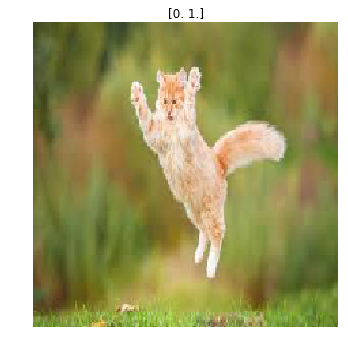

In [43]:
print("actual: ",actual[[23]],"predication: ", y_prediction[[23]])
plots(x_timgs[[23]],titles = y_labels[[23]])